In [27]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from datetime import date

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

# Scipy for statistics
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

%matplotlib inline

## 1. Populate Dataframes

In [28]:
# read from csv files
 
WF_stock = pd.read_csv(r'./Stock_Price/wFC_limited.csv',encoding='latin-1')
SAP_stock = pd.read_csv(r'./Stock_Price/SAP_limited.csv',encoding='latin-1')

In [29]:
WF_stock['Date'] = WF_stock['Date'].astype('datetime64[ns]') 
SAP_stock['Date'] = SAP_stock['Date'].astype('datetime64[ns]') 

In [30]:
WF_stock.reset_index(drop=True)
WF_stock.set_index('Date')

#WF_stock.ffill(axis = 0)
# https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe

WF_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-25,48.730000,49.540001,48.650002,49.259998,48.793034,21313100
1,2019-09-26,49.250000,49.369999,48.820000,48.869999,48.406731,19984000
2,2019-09-27,50.400002,51.410000,50.250000,50.709999,50.229290,59467400
3,2019-09-30,50.770000,50.849998,50.060001,50.439999,49.961849,26897100
4,2019-10-01,50.650002,50.779999,49.000000,49.060001,48.594933,27249300


In [31]:
SAP_stock.reset_index(drop=True)
SAP_stock.set_index('Date')

#SAP_stock.ffill(axis = 0)

SAP_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-09,115.849998,116.739998,115.580002,116.050003,116.050003,1061600
1,2019-10-10,114.959999,116.160004,114.559998,115.250000,115.250000,1062100
2,2019-10-11,125.720001,127.900002,125.470001,126.199997,126.199997,2234300
3,2019-10-14,125.940002,126.559998,125.739998,126.050003,126.050003,877700
4,2019-10-15,125.830002,127.889999,125.470001,127.180000,127.180000,830900


## 2. WF

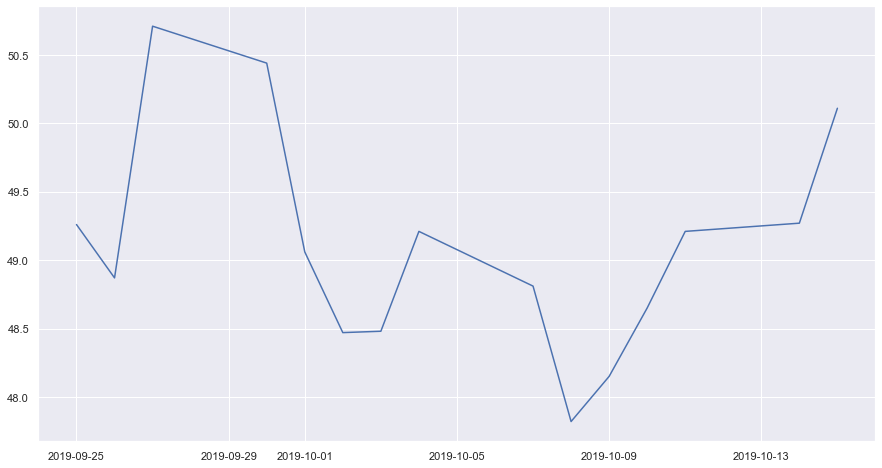

In [64]:
fig = plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.plot(WF_stock.Date, WF_stock.Close);

### 2.1. simple linear regression to show trend.

Intercept from library: 49.294226686185134
Slope from library: -0.024729908485273268


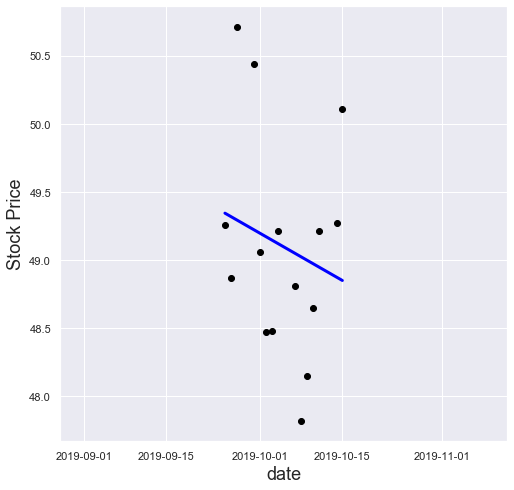

In [65]:
WF_stock['Intercept'] = 1
# Create the features and response
X = WF_stock.loc[:, ['Intercept', 'Date']]
y = WF_stock.loc[:, 'Close']

wf_announced_date = datetime(2019, 9, 27,0,0,0)  
X['Timestamp'] = X.apply(lambda row: (row.Date - wf_announced_date).days, axis = 1) 

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
wf_tb_intercept = linear_regression.intercept_
wf_tb_slope =  linear_regression.coef_[0]
# Notes: see 
# 1. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# 2. https://stackoverflow.com/questions/54352621/sklearn-linear-regression-with-date-data

plt.figure(figsize=(8, 8)) 
plt.scatter(X.Date, y,  color='black')
plt.plot(X.Date, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 18); plt.ylabel('Stock Price', size = 18); 

plt.show()

##  2.2. 1 month trend

In [73]:
WF_stock_month = pd.read_csv(r'./Stock_Price/WFC.csv',encoding='latin-1')
WF_stock_month['Date'] = WF_stock_month['Date'].astype('datetime64[ns]')
WF_stock_month.reset_index(drop=True)
WF_stock_month.set_index('Date')  
WF_stock_month.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-20,49.07,49.299999,48.610001,48.630001,48.169010,30229400
1,2019-09-23,48.32,49.090000,48.310001,48.959999,48.495880,20603400
2,2019-09-24,48.98,49.220001,48.470001,48.650002,48.188820,21629300
3,2019-09-25,48.73,49.540001,48.650002,49.259998,48.793034,21313100
4,2019-09-26,49.25,49.369999,48.820000,48.869999,48.406731,19984000


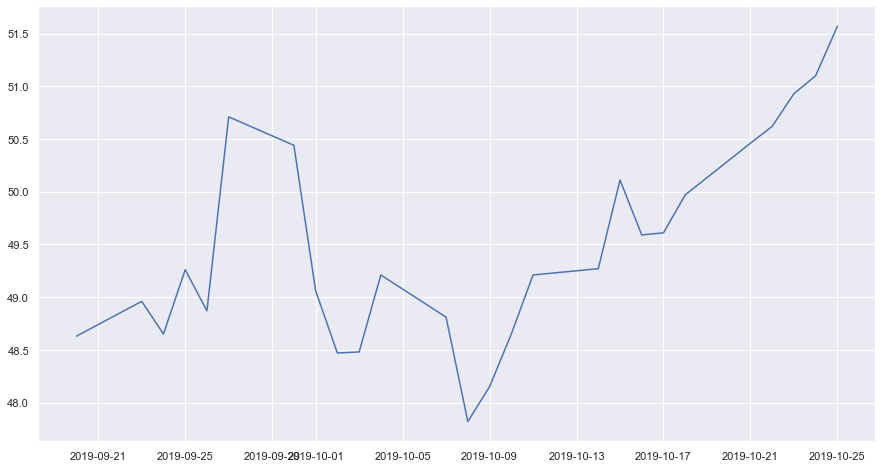

In [74]:
fig = plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.plot(WF_stock_month.Date, WF_stock_month.Close);

Intercept from library: 48.86118023678487
Slope from library: 0.05535602335697408


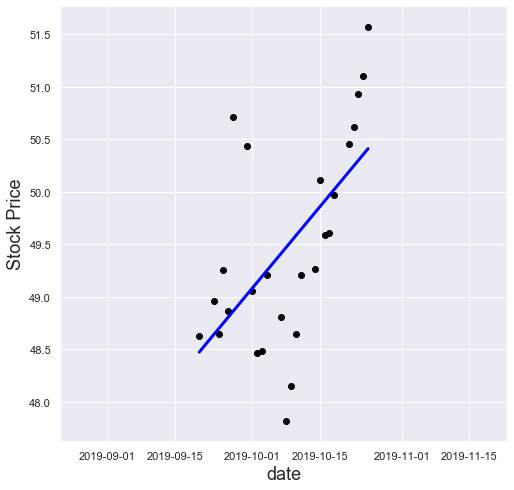

In [75]:
WF_stock_month['Intercept'] = 1
# Create the features and response
X = WF_stock_month.loc[:, ['Intercept', 'Date']]
y = WF_stock_month.loc[:, 'Close']

wf_announced_date = datetime(2019, 9, 27,0,0,0)  
X['Timestamp'] = X.apply(lambda row: (row.Date - wf_announced_date).days, axis = 1) 

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
wf_tb_intercept = linear_regression.intercept_
wf_tb_slope =  linear_regression.coef_[0]

plt.figure(figsize=(8, 8)) 
plt.scatter(X.Date, y,  color='black')
plt.plot(X.Date, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 18); plt.ylabel('Stock Price', size = 18); 

plt.show()

## 3. SAP

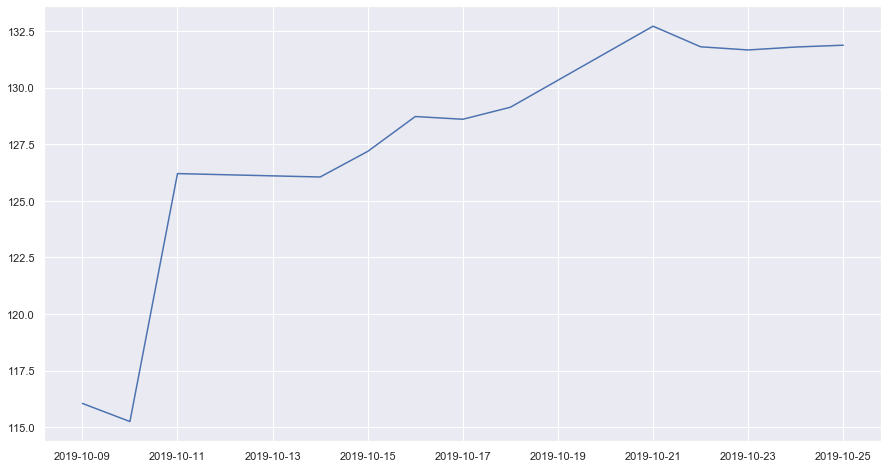

In [66]:
fig = plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.plot(SAP_stock.Date, SAP_stock.Close);

### 3.1. simple linear regression to show trend.

Intercept from library: 120.77148487331009
Slope from library: 0.9155864594417791


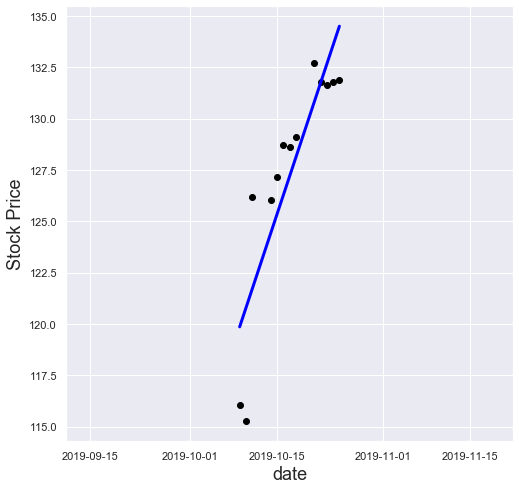

In [76]:
SAP_stock['Intercept'] = 1
# Create the features and response
X = SAP_stock.loc[:, ['Intercept', 'Date']]
y = SAP_stock.loc[:, 'Close']

sap_announced_date = datetime(2019, 10, 10,0,0,0)  
X['Timestamp'] = X.apply(lambda row: (row.Date - sap_announced_date).days, axis = 1) 

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
wf_tb_intercept = linear_regression.intercept_
wf_tb_slope =  linear_regression.coef_[0]
# Notes: see 
# 1. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# 2. https://stackoverflow.com/questions/54352621/sklearn-linear-regression-with-date-data

plt.figure(figsize=(8, 8)) 
plt.scatter(X.Date, y,  color='black')
plt.plot(X.Date, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 18); plt.ylabel('Stock Price', size = 18); 

plt.show()

## 3.2. 1 month trend

In [71]:
SAP_stock_month = pd.read_csv(r'./Stock_Price/SAP.csv',encoding='latin-1')
SAP_stock_month['Date'] = SAP_stock_month['Date'].astype('datetime64[ns]')
SAP_stock_month.reset_index(drop=True)
SAP_stock_month.set_index('Date')  
SAP_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Intercept
0,2019-10-09,115.849998,116.739998,115.580002,116.050003,116.050003,1061600,1
1,2019-10-10,114.959999,116.160004,114.559998,115.250000,115.250000,1062100,1
2,2019-10-11,125.720001,127.900002,125.470001,126.199997,126.199997,2234300,1
3,2019-10-14,125.940002,126.559998,125.739998,126.050003,126.050003,877700,1
4,2019-10-15,125.830002,127.889999,125.470001,127.180000,127.180000,830900,1


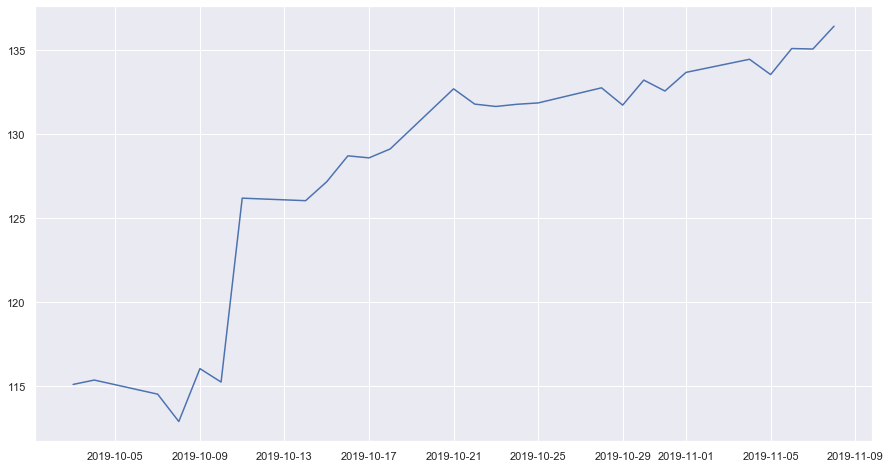

In [69]:
fig = plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.plot(SAP_stock_month.Date, SAP_stock_month.Close);

Intercept from library: 120.84132804112059
Slope from library: 0.6117762111850772


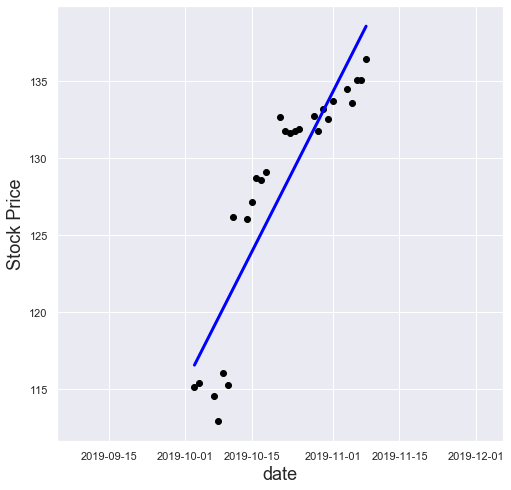

In [77]:
SAP_stock_month['Intercept'] = 1
# Create the features and response
X = SAP_stock_month.loc[:, ['Intercept', 'Date']]
y = SAP_stock_month.loc[:, 'Close']

sap_announced_date = datetime(2019, 10, 10,0,0,0)  
X['Timestamp'] = X.apply(lambda row: (row.Date - sap_announced_date).days, axis = 1) 

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
wf_tb_intercept = linear_regression.intercept_
wf_tb_slope =  linear_regression.coef_[0]

plt.figure(figsize=(8, 8)) 
plt.scatter(X.Date, y,  color='black')
plt.plot(X.Date, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 18); plt.ylabel('Stock Price', size = 18); 

plt.show()

### 3.3. Simple  linear regression without 10/09 and 10/10

In [34]:
SAP_stock2 = pd.read_csv(r'./Stock_Price/SAP_limited_2.csv',encoding='latin-1')
SAP_stock2['Date'] = SAP_stock2['Date'].astype('datetime64[ns]') 
SAP_stock2.reset_index(drop=True)
SAP_stock2.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-11,125.720001,127.900002,125.470001,126.199997,126.199997,2234300
2019-10-14,125.940002,126.559998,125.739998,126.050003,126.050003,877700
2019-10-15,125.830002,127.889999,125.470001,127.180000,127.180000,830900
2019-10-16,128.850006,129.279999,128.470001,128.720001,128.720001,1091500
2019-10-17,129.949997,130.119995,128.350006,128.600006,128.600006,972200
2019-10-18,129.779999,129.960007,127.949997,129.130005,129.130005,1655800
2019-10-21,132.979996,133.320007,131.270004,132.710007,132.710007,1210500
2019-10-22,133.309998,133.979996,131.580002,131.800003,131.800003,1092200
2019-10-23,130.910004,131.839996,130.860001,131.660004,131.660004,709100


Intercept from library: 125.19148737991269
Slope from library: 0.5062880502183401


C:\Users\yulmee\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


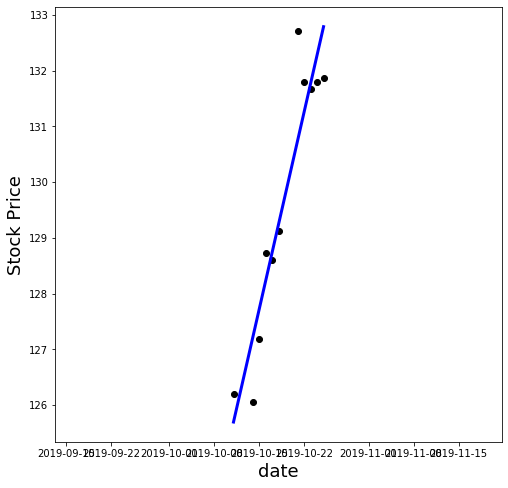

In [36]:





SAP_stock2['Intercept'] = 1
# Create the features and response
X = SAP_stock2.loc[:, ['Intercept', 'Date']]
y = SAP_stock2.loc[:, 'Close']

sap_announced_date = datetime(2019, 10, 10,0,0,0)  
X['Timestamp'] = X.apply(lambda row: (row.Date - sap_announced_date).days, axis = 1) 

linear_regression = LinearRegression()
linear_regression.fit(np.array(X.Timestamp).reshape(-1,1),y)
y_pred = linear_regression.predict(X.Timestamp.values.astype(float).reshape(-1,1))
# df.time.values.astype(float).reshape(-1, 1)
print('Intercept from library:', linear_regression.intercept_)
print('Slope from library:', linear_regression.coef_[0])
wf_tb_intercept = linear_regression.intercept_
wf_tb_slope =  linear_regression.coef_[0]
# Notes: see 
# 1. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# 2. https://stackoverflow.com/questions/54352621/sklearn-linear-regression-with-date-data

plt.figure(figsize=(8, 8)) 
plt.scatter(X.Date, y,  color='black')
plt.plot(X.Date, y_pred, color='blue', linewidth=3)
plt.xlabel('date', size = 18); plt.ylabel('Stock Price', size = 18); 

plt.show()